## GRIP - The Sparks Foundation Task - 6

## Task 6 - Prediction Using Decision Tree Algorithm

### Performed By - Akash Todkar

## Step - 1: Import Libraries And Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
import statsmodels

## Import Data

In [67]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Iris (1).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
df=df.drop(['Id'] , axis = 1)

In [69]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Step 2 : Data Pre-Processing : Checking Missing Values And Outliers

In [71]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

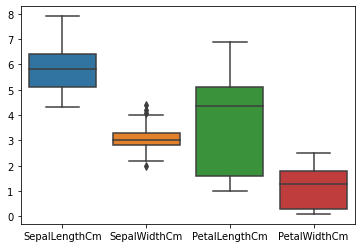

In [72]:
sns.boxplot(data = df)

In [79]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 
lower_limit = q1-1.5*iqr 
upper_limit = q3+1.5*iqr 

In [80]:
df['SepalWidthCm']=np.where(df['SepalWidthCm'] > upper_limit,upper_limit,df['SepalWidthCm'])

In [81]:
df['SepalWidthCm']=np.where(df['SepalWidthCm'] < lower_limit,lower_limit,df['SepalWidthCm'])

## Apply LabelEncoder On Data

In [82]:
from sklearn.preprocessing import LabelEncoder
df.Species = LabelEncoder().fit_transform(df.Species)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Step-3: Data Partition

In [83]:
from sklearn.model_selection import train_test_split

x = df.drop(['Species'],axis=1)
y = df[['Species']]

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=100)

## Step 4: Model Building

In [84]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)  

DecisionTreeClassifier()

In [16]:
?tree.DecisionTreeRegressor

## Step 5: Plotting the Tree

In [85]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,0,4.6,3.4,1.4,0.3
25,0,5.0,3.0,1.6,0.2
21,0,5.1,3.7,1.5,0.4
92,1,5.8,2.6,4.0,1.2
9,0,4.9,3.1,1.5,0.1


In [86]:
independent_variable = list(train.columns[1:])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## Step 6: Visualization of The Decision Tree

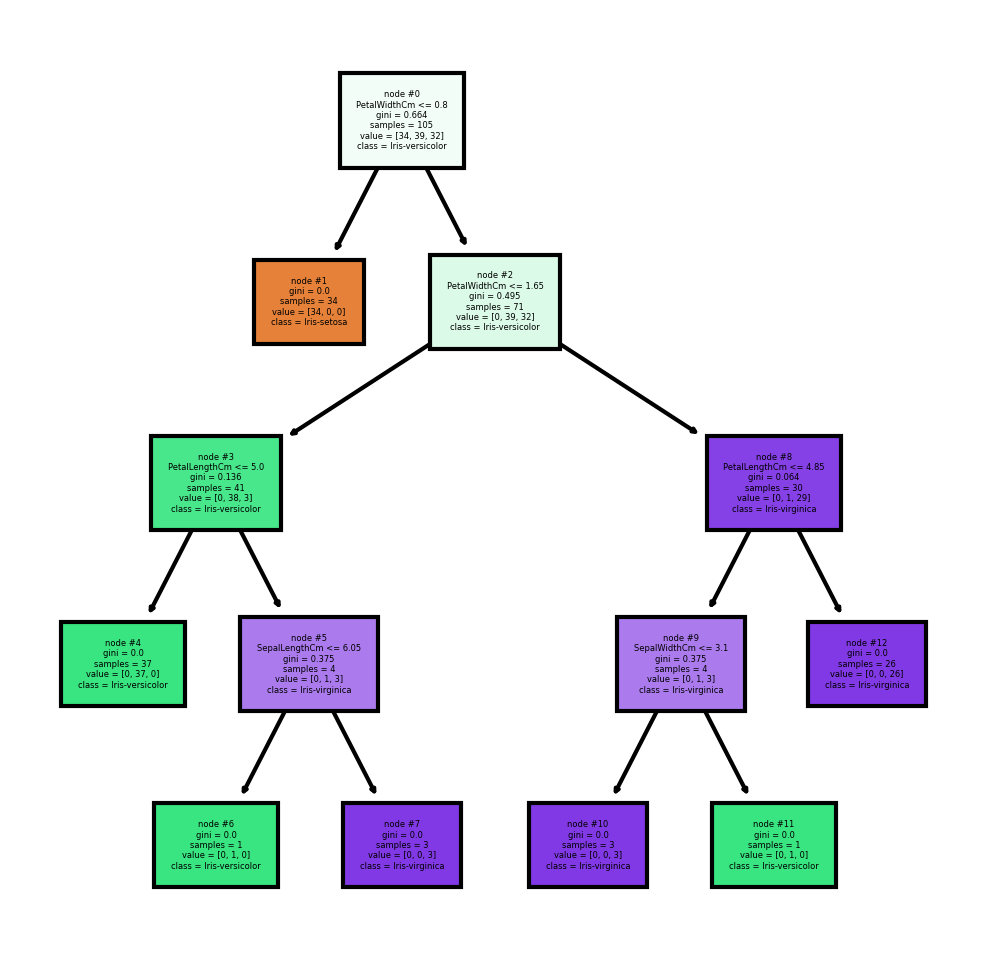

In [87]:
from sklearn import tree
import matplotlib.pyplot as plt

Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(dt, 
               feature_names = independent_variable,
               class_names = Species,
               filled = True, 
              node_ids = True, 
              fontsize = 2); 

### The Above Figure Is The Decision Tree Classifier. Now If We Feed Any Data To This Classifier It Would Be Able To Predict The Right Class Accordingly.

# Thank You...!